# Prüfung
Bitte organisiert euch für die Prüfung als Gruppe von zwei bis drei Leuten und **schickt mir als Gruppe eine Email mit den Informationen mit dem gewünschten Prüfungstermin (18.06. oder 30.07.) und den Gruppenmitgliedern im Betreff der Email**. 

Muster:

Anmeldung Prüfung - 18.06. - Anna A und Max M

Ich teile euch dann euren Zeitslot und euer Präsentationsthema mit. 

In [1]:
#setwd("~//praxiskurs_fss21/")
options(repr.plot.width=8, repr.plot.height=3,repr.plot.res = 300)
library(ggplot2)

library(magrittr)
library(tidyr)
library(plotly)
library(dplyr)


Attaching package: 'tidyr'


The following object is masked from 'package:magrittr':

    extract



Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
download.file("https://covid.ourworldindata.org/data/owid-covid-data.csv", "data/owid-covid-data.csv")

In [3]:
df_covid <- read.csv("data/RKI_COVID19.csv")
df_owid <- read.csv("data/owid-covid-data.csv")

In [4]:
df_owid$date <- as.Date(df_owid$date)
df_covid$Meldedatum <- as.Date(df_covid$Meldedatum)
dates <- seq(min(df_covid$Meldedatum)-3, max(df_covid$Meldedatum), by="day") 
df_complete  <- data.frame(dates = dates )
df_complete$cases_per_day <- sapply(dates, function(date) sum(df_covid$AnzahlFall[df_covid$Meldedatum == date])  )
df_complete$runmean_cases <- caTools::runmean(df_complete$cases_per_day, k=7, align="center")
df_complete$deaths_per_day <- sapply(dates, function(date) sum(df_covid$AnzahlTodesfall[df_covid$Meldedatum == date])  )
df_complete$runmean_deaths <- caTools::runmean(df_complete$deaths_per_day, k=7, align="center")
df_complete <- df_complete[dates<=max(df_covid$Meldedatum),]

In [5]:
df_agegroups <- df_covid %>% 
    dplyr::select(c(Altersgruppe,AnzahlFall,AnzahlTodesfall)) %>% 
    tidyr::pivot_longer(cols = Altersgruppe,values_to =  "Altersgruppe")
df_agegroups %>% head

AnzahlFall,AnzahlTodesfall,name,Altersgruppe
<int>,<int>,<chr>,<chr>
1,0,Altersgruppe,A15-A34
1,0,Altersgruppe,A05-A14
1,0,Altersgruppe,A15-A34
1,0,Altersgruppe,A05-A14
1,0,Altersgruppe,A15-A34
1,0,Altersgruppe,A05-A14


In [6]:
df_agegroups  <- df_agegroups %>% 
    group_by(Altersgruppe) %>% 
    summarise(cases = sum(AnzahlFall),deaths=sum(AnzahlTodesfall))


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


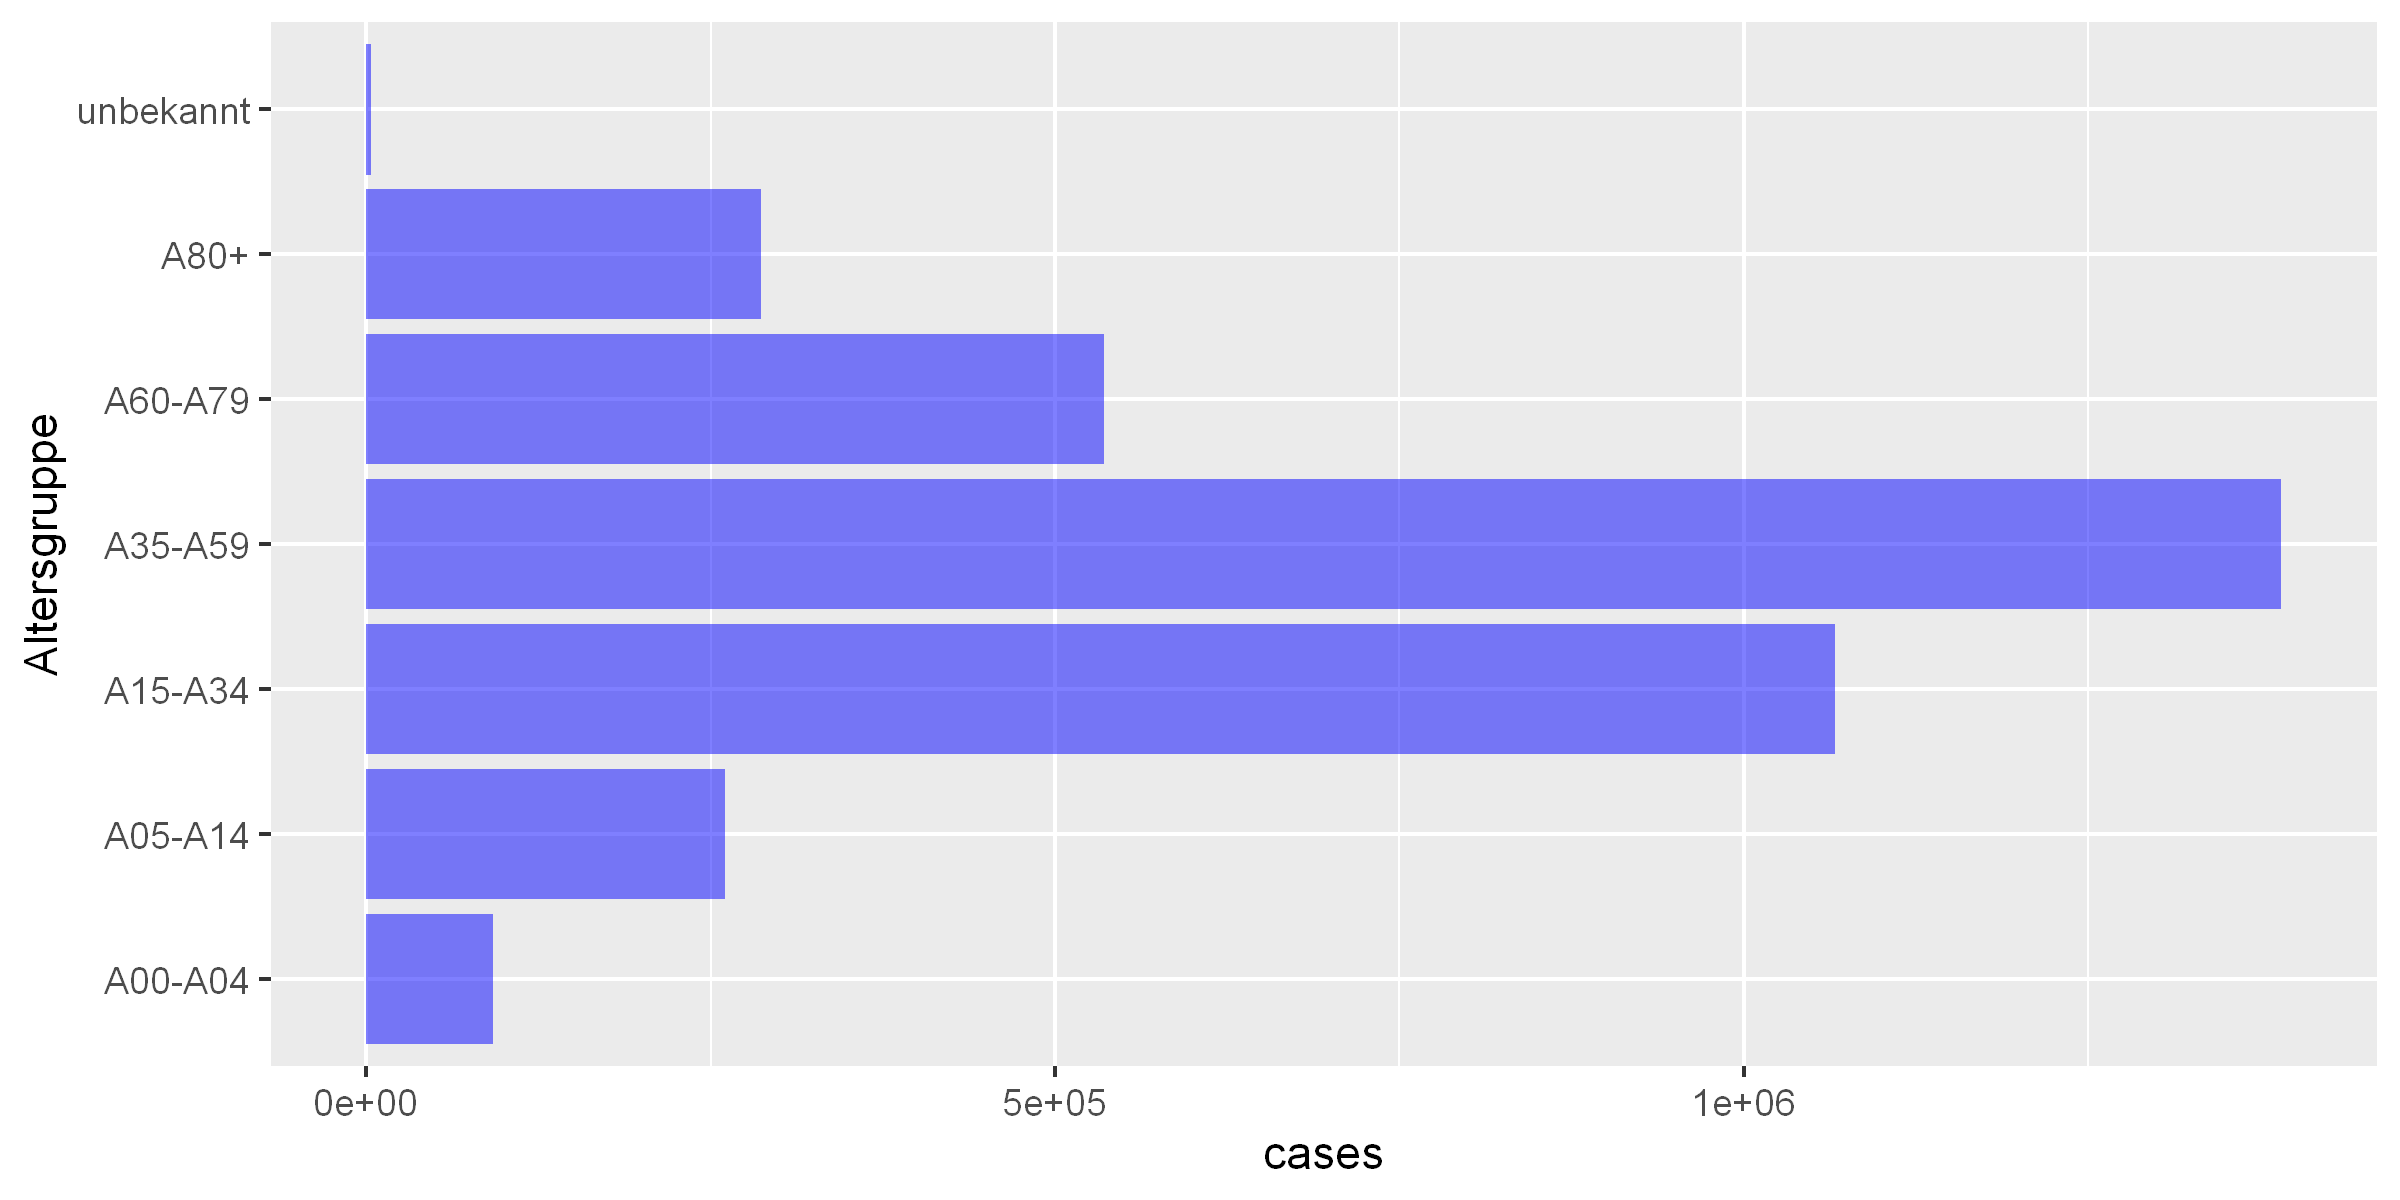

In [7]:
options(repr.plot.width=8, repr.plot.height=4,repr.plot.res = 300)

ggplot(df_agegroups, aes(x=cases, y= Altersgruppe)) +
    geom_histogram(stat="identity",fill="blue",alpha=0.5)

In [8]:
bins <- c(0,5,15,35,60,80,100)
df_ages <- integer(0)
for(i in 1:(length(bins)-1) ){
    age_bin  <- seq(bins[i],bins[i+1]-1, by = 1)
    df_ages  <- c(df_ages, sample(age_bin, size =  df_agegroups$cases[i], replace = T ) )
}
head(df_ages)

[1] 1 0 3 0 1 3

# Aufgabe
* Erstellt Histogramme für die folgenden Fälle:
    * Die Daten streuen am linken Ende der jeweiligen Altersgruppe.
    * Die Daten streuen am rechten Ende der jeweiligen Altersgruppe.
* Versucht die Daten mithilfe eines Kerndichteschätzers zu glätten. Verwendet dafür die Funktion ksmooth aus dem Paket stats.

*Hinweis:* Eine Funktion $k:\mathbb{R} \to \mathbb{R}$ heißt Kern, falls
\\[ \int k(x) \ \mathrm{d}x = 1.\\]
Für gegebene Daten $x_1,...x_n \in \mathbb{R}$ ist der Kerndichteschätzer zu $k$ mit Bandbreite (bandwidth) $h>0$ definiert als
\\[ K(y) = \frac{1}{n} \sum_{i=1}^n \frac{1}{h} k\left( \frac{y-x}{h}\right),\\]
für $y \in \mathbb{R}$. Dabei definiert $K$ eine Wahrscheinlichkeitsdichte auf $\mathbb{R}$, falls $k>0$.

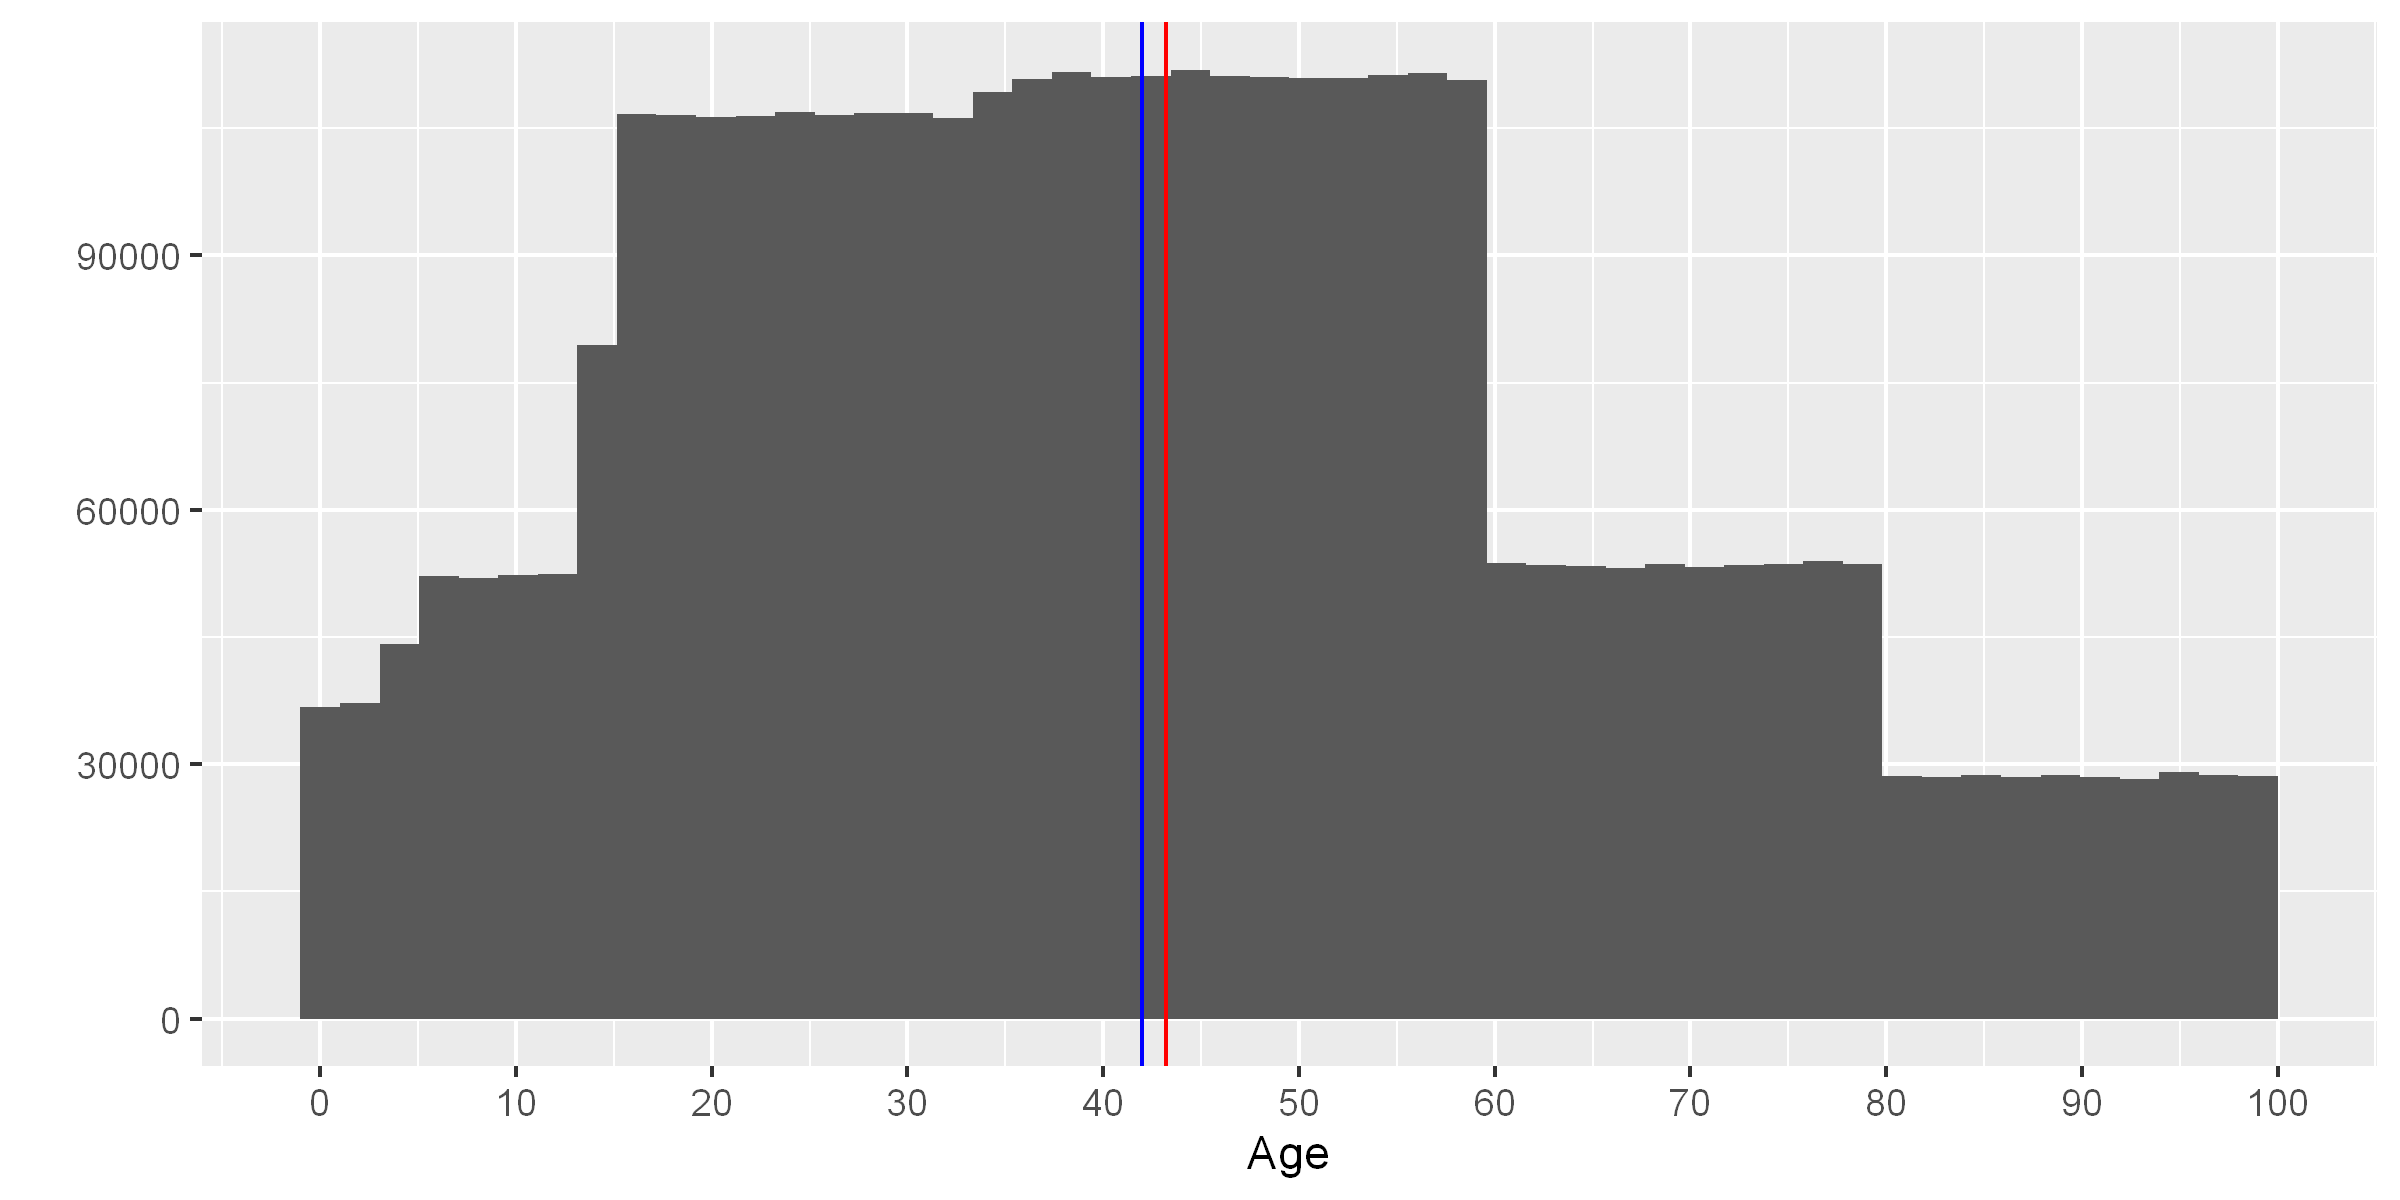

In [9]:
qplot(x=df_ages,geom = "histogram",bins="50",xlab="Age") + 
    geom_vline(xintercept = median(df_ages),color="blue") + 
    geom_vline(xintercept = mean(df_ages), color="red") +
    scale_x_continuous(n.breaks = 10)


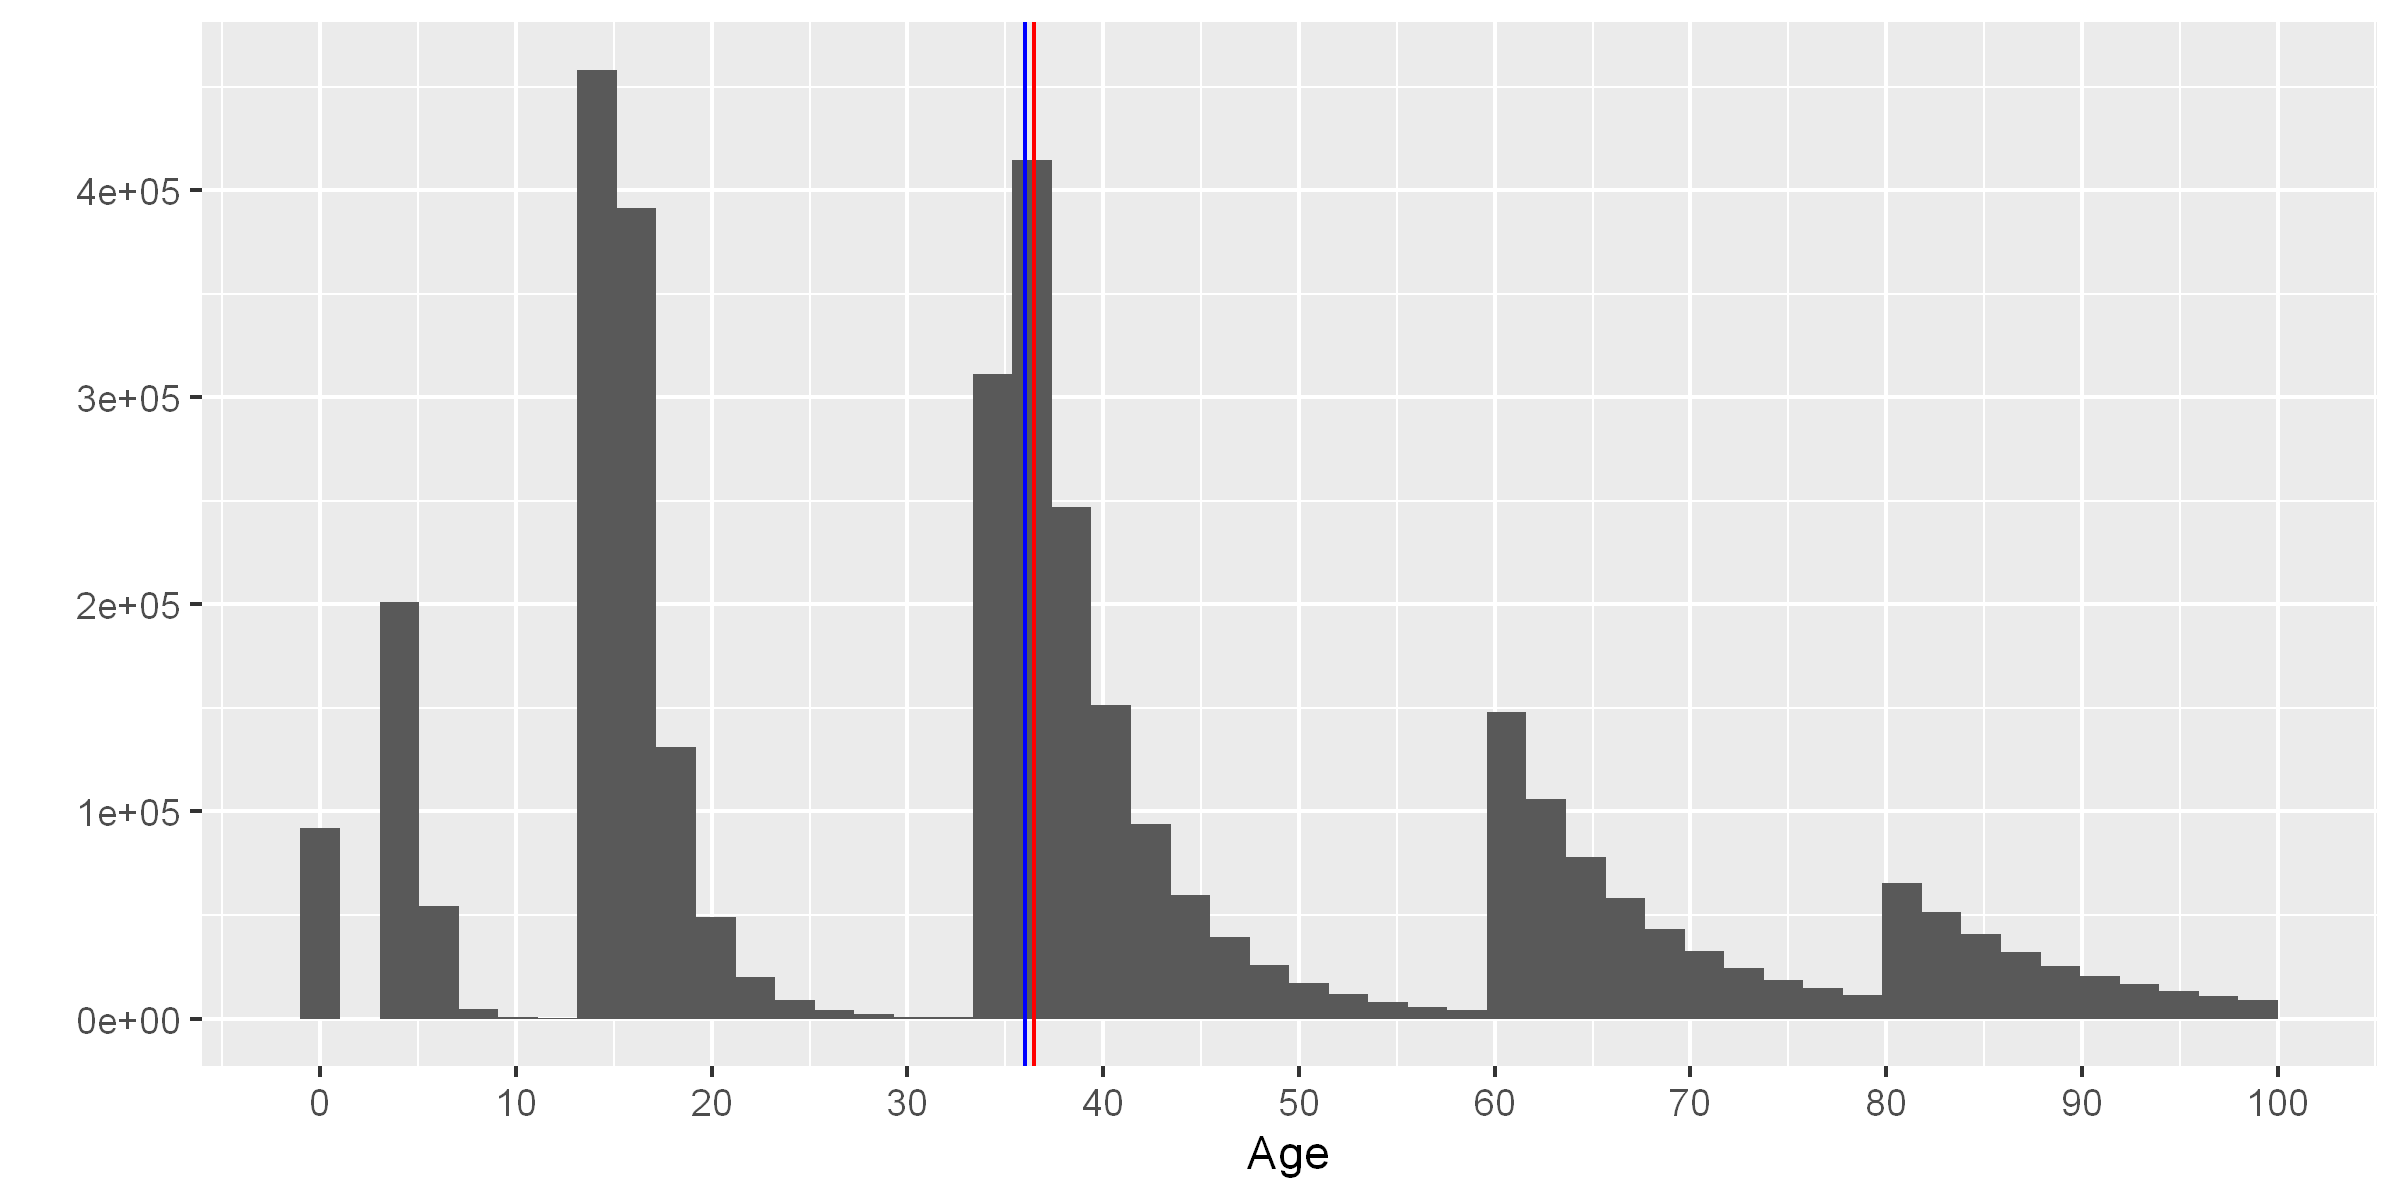

In [10]:
df_ages_left_skewed <- integer(0)
for(i in 1:(length(bins)-1) ){
    age_bin  <- seq(bins[i],bins[i+1]-1, by = 1)
    df_ages_left_skewed  <- c(df_ages_left_skewed, sample(age_bin, size =  df_agegroups$cases[i], replace = T, 
                                              prob = 1/(age_bin+1)^10) )
}
qplot(x=df_ages_left_skewed,geom = "histogram",bins="50",xlab="Age")+ 
    geom_vline(xintercept = median(df_ages_left_skewed),color="blue") + 
    geom_vline(xintercept = mean(df_ages_left_skewed), color="red") +
    scale_x_continuous(n.breaks = 10)



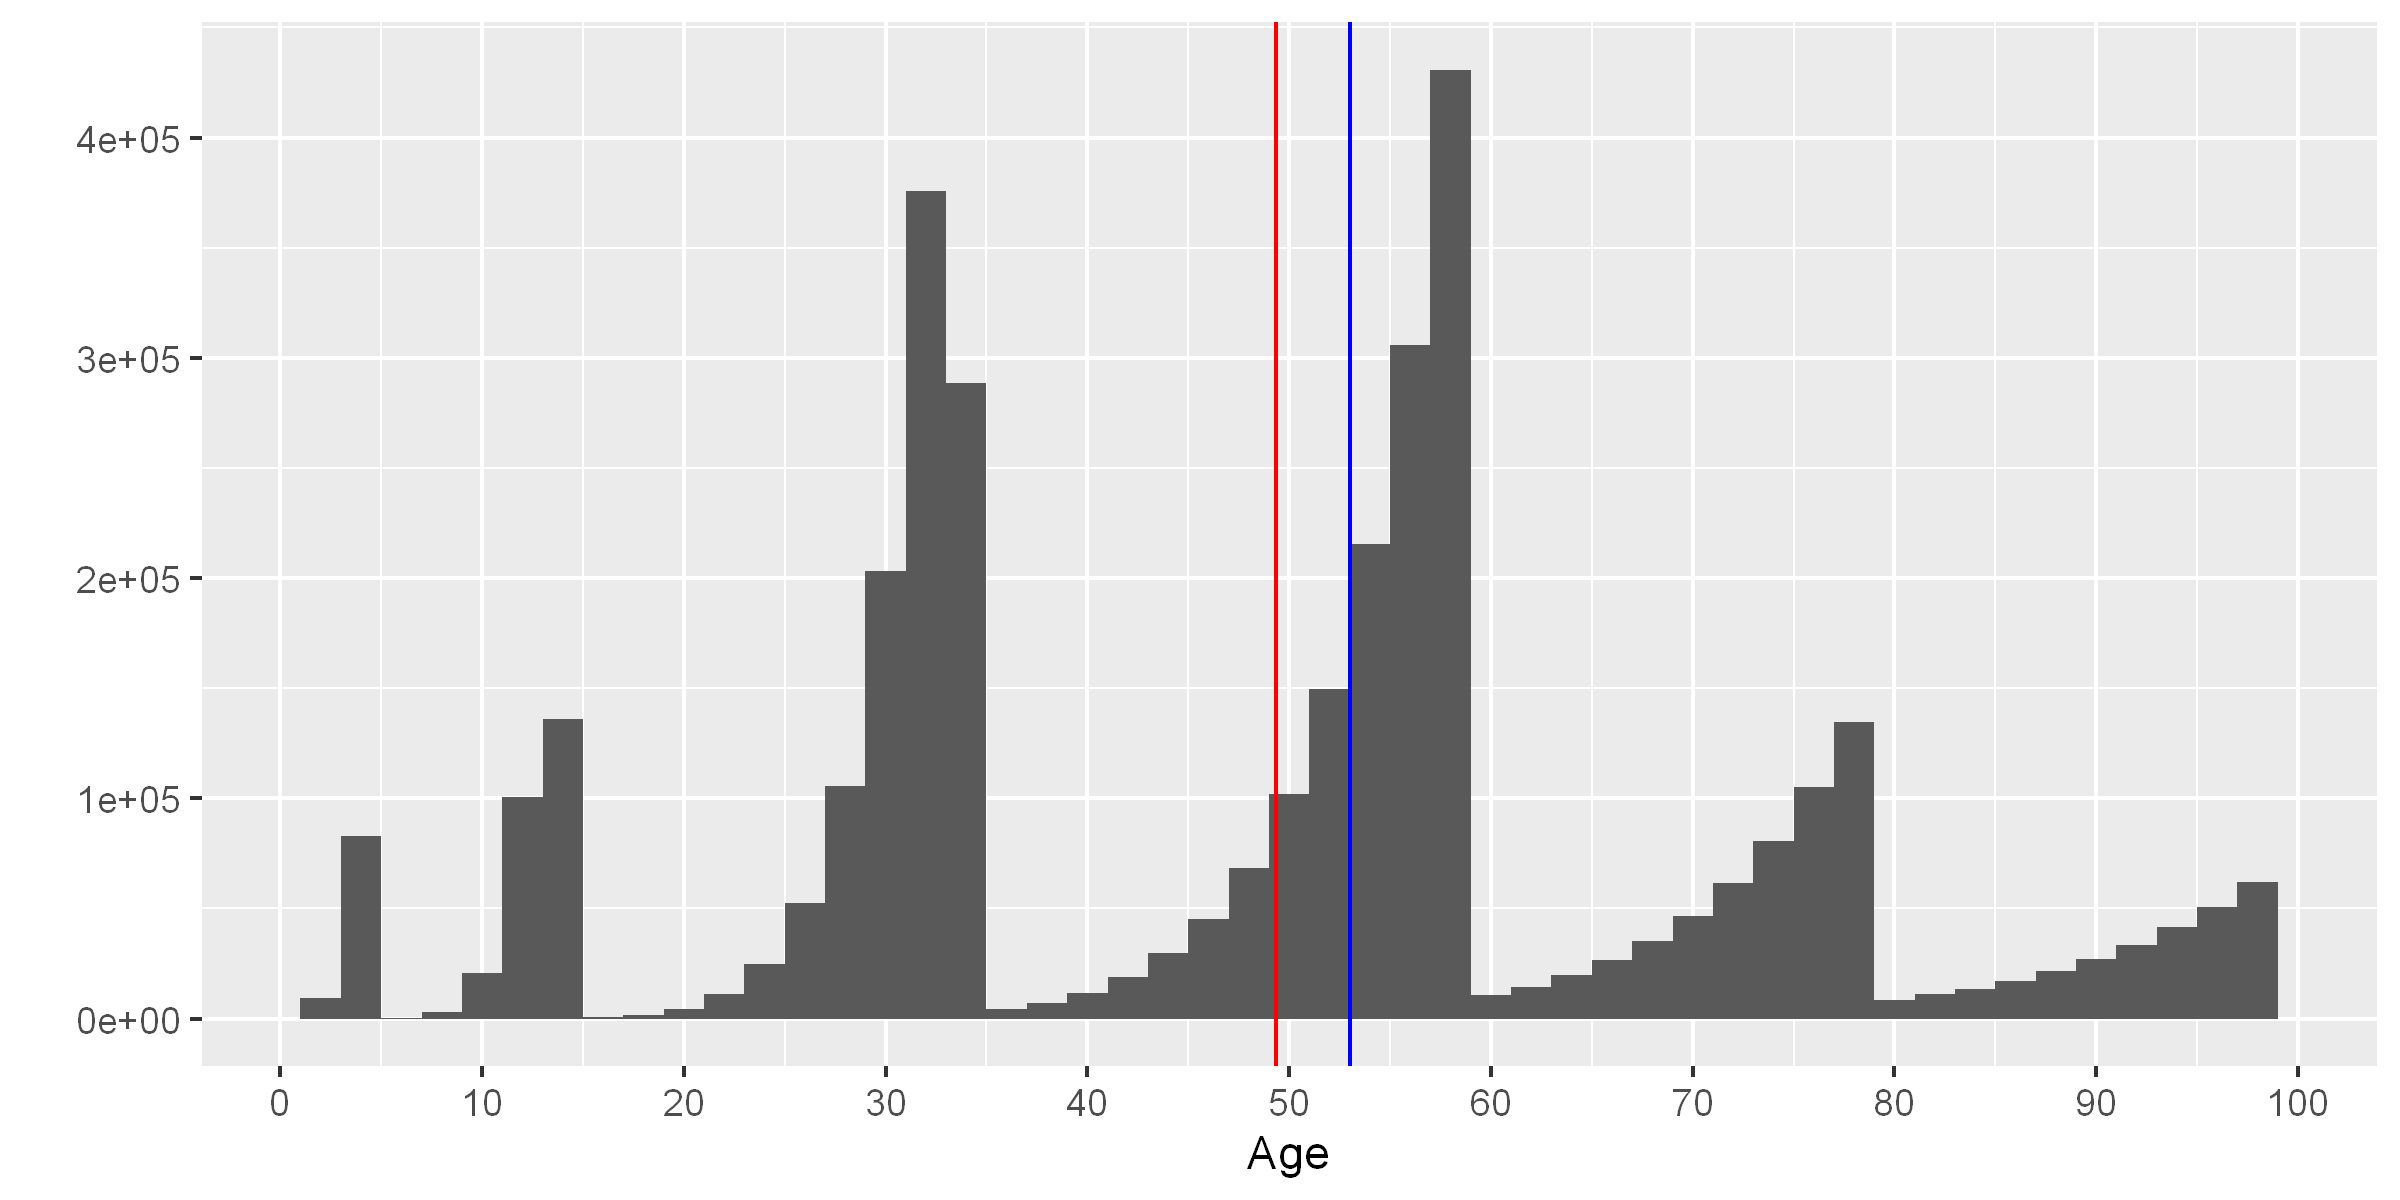

In [11]:
df_ages_right_skewed <- integer(0)
for(i in 1:(length(bins)-1) ){
    age_bin  <- seq(bins[i],bins[i+1]-1, by = 1)
    df_ages_right_skewed  <- c(df_ages_right_skewed, sample(age_bin, size =  df_agegroups$cases[i], replace = T, 
                                              prob = (age_bin+1)^10) )
}
qplot(x=df_ages_right_skewed,geom = "histogram",bins="50",xlab="Age")+ 
    geom_vline(xintercept = median(df_ages_right_skewed),color="blue") + 
    geom_vline(xintercept = mean(df_ages_right_skewed), color="red") +
    scale_x_continuous(n.breaks = 10)


In [12]:
table(df_ages)

df_ages
    0     1     2     3     4     5     6     7     8     9    10    11    12 
18569 18220 18769 18398 18265 25914 25984 26190 26068 25913 26167 26129 26373 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
26106 25796 53693 53328 53378 53297 53229 53263 53109 53270 53206 53199 53676 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
53163 53350 53436 53360 53736 53055 52997 53274 53474 55768 55300 55511 55854 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
55837 55515 55575 55319 55886 55765 56136 55459 55694 55268 55799 55112 55795 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
55130 55837 55637 55592 55810 55749 55130 55516 26939 26786 26626 26882 26906 
   65    66    67    68    69    70    71    72    73    74    75    76    77 
26434 26631 26498 26778 26870 26617 26647 26699 26805 26677 26951 27043 26912 
   78    79    80    81    82    83    84   

Warning message:
"Removed 23 row(s) containing missing values (geom_path)."


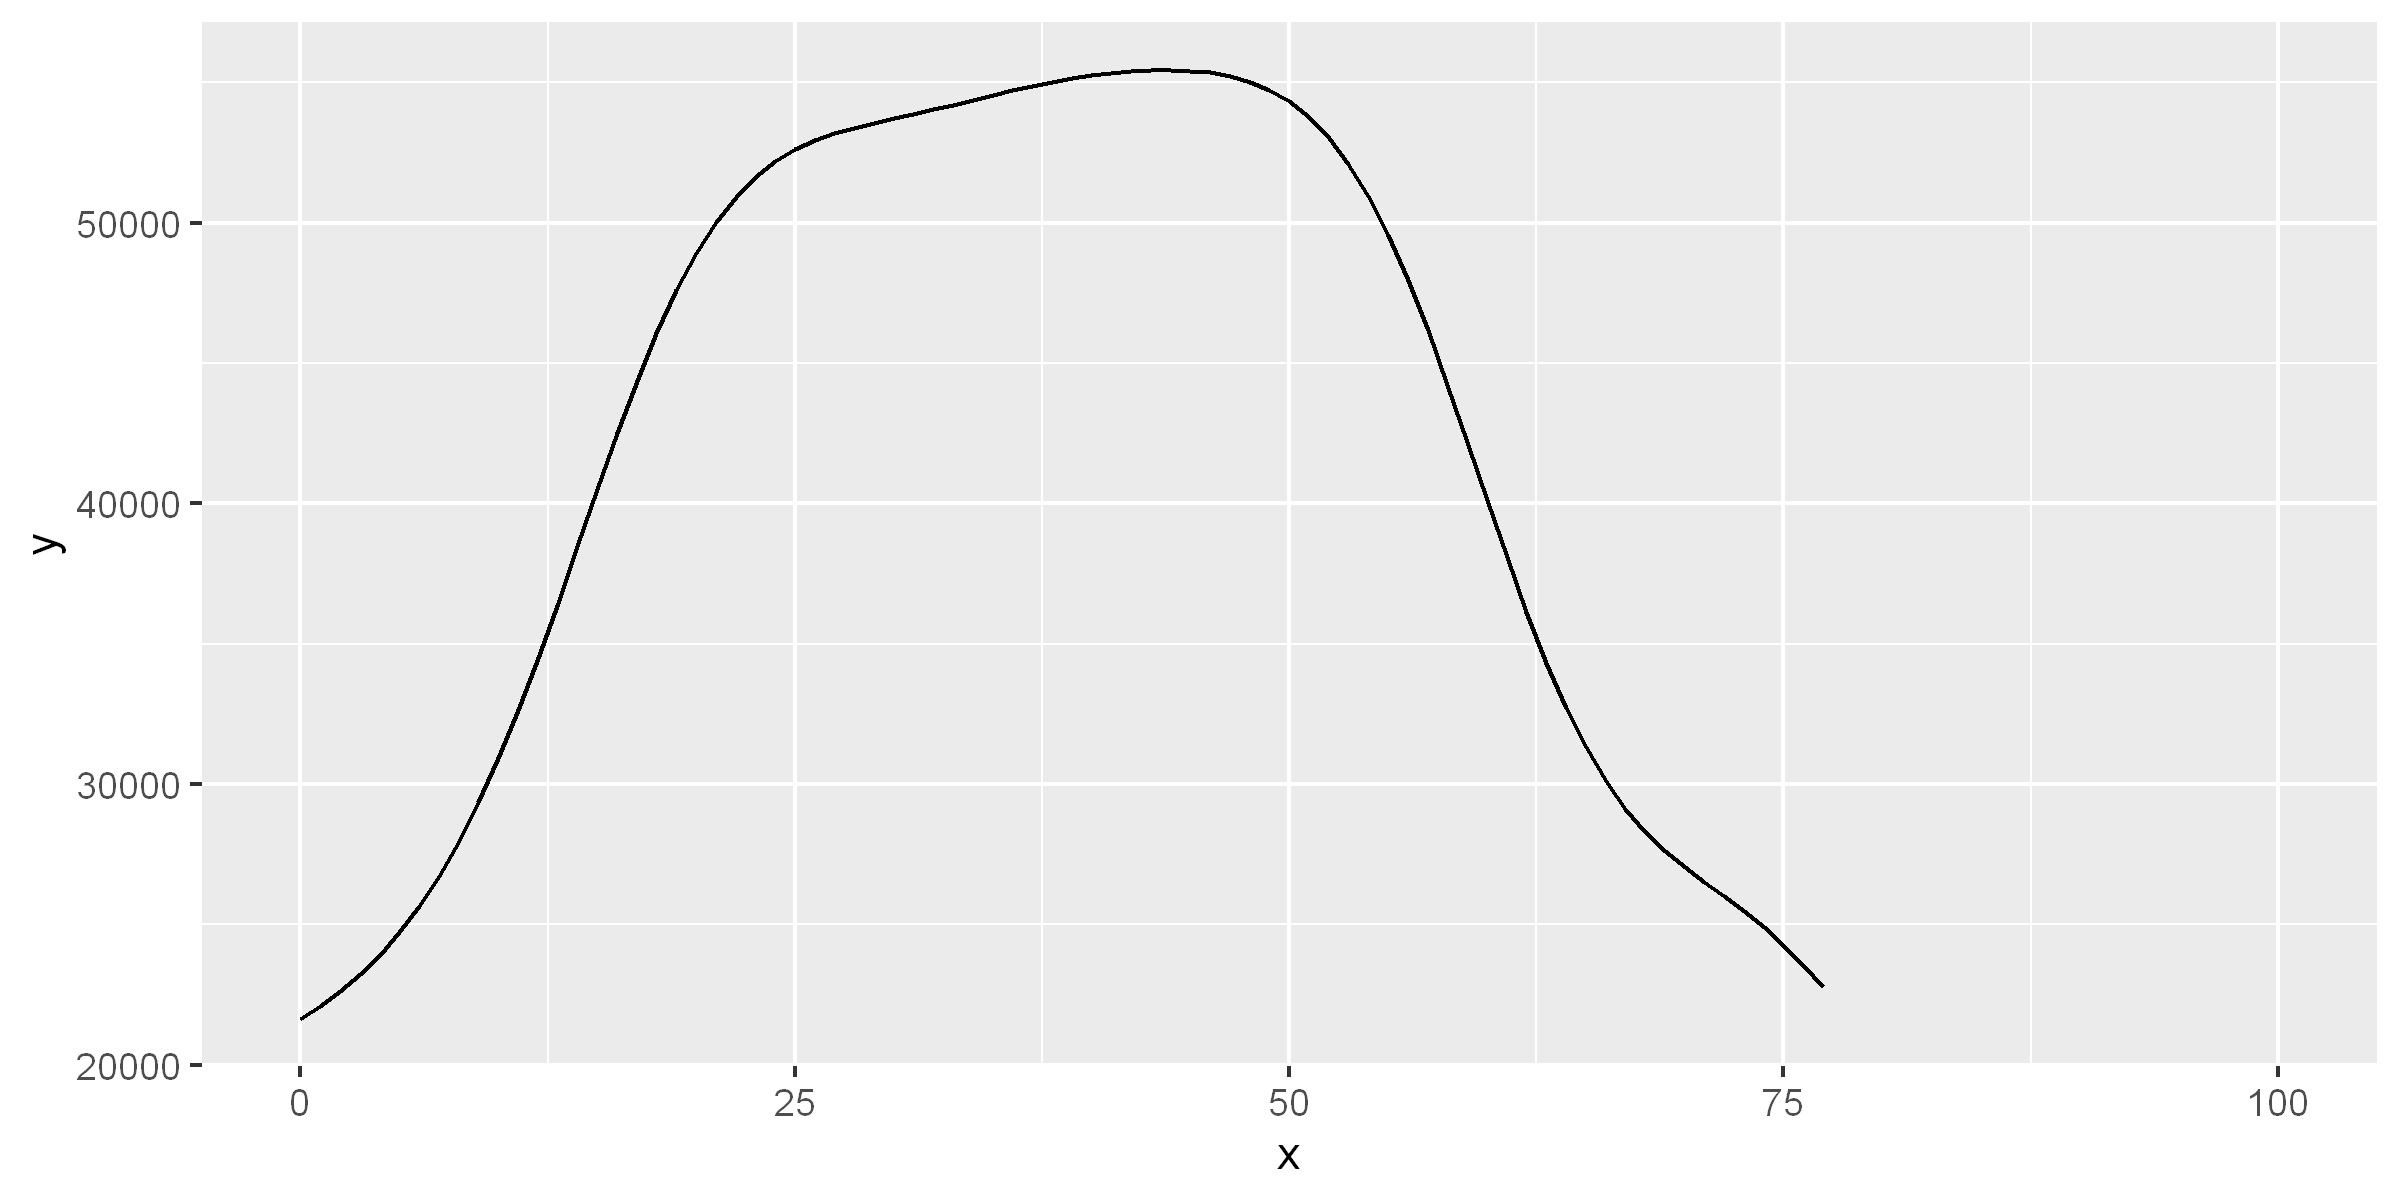

In [13]:
smoothed <- stats::ksmooth(x=seq(0,100,by=1), y = table(df_ages),kernel = "normal", bandwidth = 15)
ggplot(as.data.frame(smoothed)) + geom_line(aes(x=x,y=y))

In [14]:
df_covid %>% head

,ï..ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<date>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>
1,1,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2021-03-20,1001,"21.05.2021, 00:00 Uhr",0,-9,2021/03/20 00:00:00+00,0,1,0,Nicht Ã¼bermittelt
2,2,1,Schleswig-Holstein,SK Kiel,A05-A14,M,1,0,2021-01-20,1002,"21.05.2021, 00:00 Uhr",0,-9,2021/01/16 00:00:00+00,0,1,1,Nicht Ã¼bermittelt
3,3,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2021-03-21,1001,"21.05.2021, 00:00 Uhr",0,-9,2021/03/13 00:00:00+00,0,1,1,Nicht Ã¼bermittelt
4,4,1,Schleswig-Holstein,SK Kiel,A05-A14,M,1,0,2021-01-20,1002,"21.05.2021, 00:00 Uhr",0,-9,2021/01/20 00:00:00+00,0,1,0,Nicht Ã¼bermittelt
5,5,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2021-03-21,1001,"21.05.2021, 00:00 Uhr",0,-9,2021/03/19 00:00:00+00,0,1,1,Nicht Ã¼bermittelt
6,6,1,Schleswig-Holstein,SK Kiel,A05-A14,M,1,0,2021-01-22,1002,"21.05.2021, 00:00 Uhr",0,-9,2021/01/21 00:00:00+00,0,1,1,Nicht Ã¼bermittelt


Das RKI macht Korrekturen und Neuübermittlungen im Datensatz durch die Spalte NeuerFall bzw. NeuerTodesFall kenntlich. 

https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0

# Aufgabe
* Macht euch mit der Methodologie zu den Spalten vertraut. Wie wird eine Korrektur kenntlich gemacht, wie eine Neuübermittlung?
* Plottet für Fälle und für Todesfälle die Zeitreihen der Korrekturen und der Neuübermittlungen im heutigen Datensatz. Welche Korrektur liegt am weitesten zurück?


In [15]:
df_population <- read.csv2("https://service.destatis.de/bevoelkerungspyramide/data/14_bevoelkerungsvorausberechnung_daten.csv")

In [16]:
df_population %>% head

,Variante,Simulationsjahr,mw,Bev,Bev_0_1,Bev_1_2,Bev_2_3,Bev_3_4,Bev_4_5,Bev_5_6,...,Bev_90_91,Bev_91_92,Bev_92_93,Bev_93_94,Bev_94_95,Bev_95_96,Bev_96_97,Bev_97_98,Bev_98_99,Bev_99_100
,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,1950,m,31962,542,518,483,460,404,379,...,0,0,0,0,0,0,0,0,0,0
2,0,1950,w,37384,512,492,459,439,387,369,...,0,0,0,0,0,0,0,0,0,0
3,0,1951,m,32198,541,535,520,486,460,408,...,0,0,0,0,0,0,0,0,0,0
4,0,1951,w,37587,513,507,495,463,439,392,...,0,0,0,0,0,0,0,0,0,0
5,0,1952,m,32409,544,536,533,520,485,458,...,0,0,0,0,0,0,0,0,0,0
6,0,1952,w,37754,514,509,506,495,462,438,...,0,0,0,0,0,0,0,0,0,0


In [17]:
(df_population2020 <- df_population %>% filter(Variante==1,Simulationsjahr==2020))

Variante,Simulationsjahr,mw,Bev,Bev_0_1,Bev_1_2,Bev_2_3,Bev_3_4,Bev_4_5,Bev_5_6,...,Bev_90_91,Bev_91_92,Bev_92_93,Bev_93_94,Bev_94_95,Bev_95_96,Bev_96_97,Bev_97_98,Bev_98_99,Bev_99_100
<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2020,m,41155,406,409,409,409,413,401,...,66,51,40,27,19,13,8,5,3,2
1,2020,w,42209,386,390,391,391,396,381,...,138,114,93,72,57,44,31,22,16,11


In [18]:
df_population2020  <- df_population2020 %>% 
    summarise_at(vars(starts_with("Bev")),sum) %>% 
    tidyr::pivot_longer(cols = everything(),names_to = "age")

In [19]:
df_population2020 %>% head

age,value
<chr>,<int>
Bev,83364
Bev_0_1,792
Bev_1_2,799
Bev_2_3,800
Bev_3_4,800
Bev_4_5,809


Extrahieren der letzten Zahl des Spalte age, um auf das Alter zu schließen. Benötigt kompliziertes regex, aber Stackoverflow hilft: https://stackoverflow.com/a/5320864

In [20]:
library(stringr)
df_population2020 <- df_population2020 %>% 
    filter(age!="Bev") %>% 
    mutate(age=str_extract(age,"(\\d+)(?!.*\\d)") %>% as.numeric, age = age-1) %>%  
    mutate(group = sapply(age,function(x) sum(x>=bins) ))
df_population2020 %>% head

age,value,group
<dbl>,<int>,<int>
0,792,1
1,799,1
2,800,1
3,800,1
4,809,1
5,782,2


In [21]:
df_agegroups$Altersgruppe

[1] "A00-A04"   "A05-A14"   "A15-A34"   "A35-A59"   "A60-A79"   "A80+"     
[7] "unbekannt"

In [22]:
(df_population_grouped <- df_population2020 %>% 
    group_by(group) %>% 
    summarise(population=sum(value)) %>% 
    mutate(Altersgruppe = df_agegroups$Altersgruppe[-7]))

group,population,Altersgruppe
<int>,<int>,<chr>
1,4000,A00-A04
2,7454,A05-A14
3,19035,A15-A34
4,28757,A35-A59
5,18197,A60-A79
6,5906,A80+


In [23]:
df_agegroups <- df_population_grouped %>% select(-group) %>%  inner_join(df_agegroups)
df_agegroups

Joining, by = "Altersgruppe"



population,Altersgruppe,cases,deaths
<int>,<chr>,<int>,<int>
4000,A00-A04,92221,9
7454,A05-A14,260640,6
19035,A15-A34,1066493,162
28757,A35-A59,1389994,3501
18197,A60-A79,535324,25432
5906,A80+,286371,57984


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


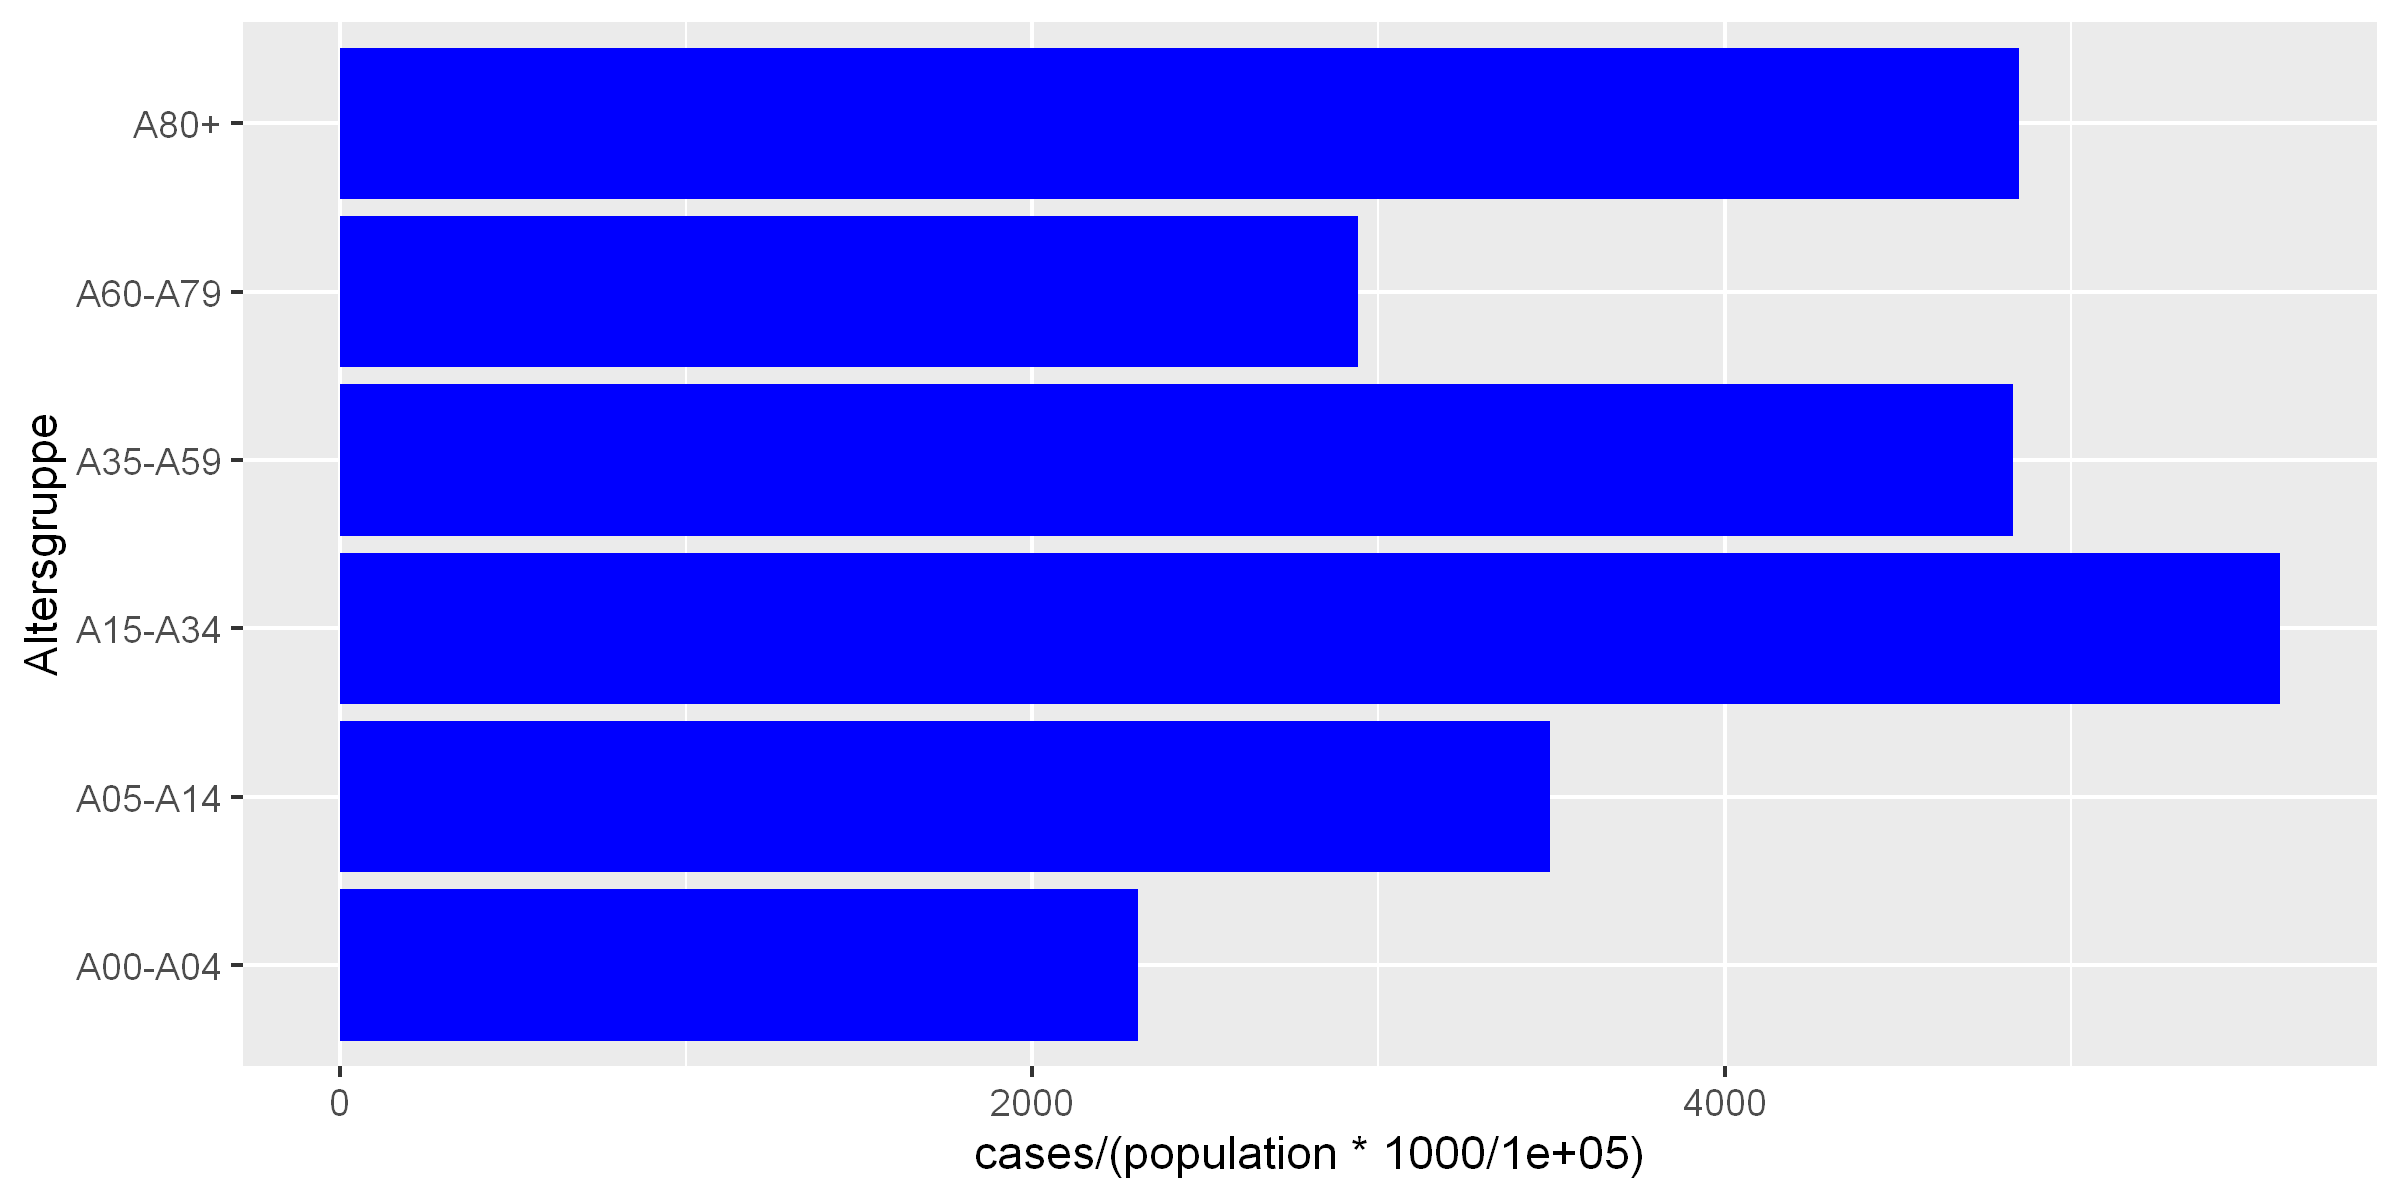

In [24]:
ggplot(df_agegroups) + 
    geom_histogram(aes(y = Altersgruppe, x = cases/(population * 1e3/1e5 ) ), stat = "identity", fill="blue")

Deutschlandweit werden die Inzidenzen pro Altersgruppe gesammelt erhoben:

https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Altersverteilung.html

# Aufgabe
* Verwendet die Tabelle der Altersverteilung, um die Inzidenzen nach Altersklassen zu plotten

(Bonus)

* Verwendet die obigen Berechnungen zur Population, um die Zeitreihe der Fatalitätsrate (Todesfälle/Infektionen) zu dieser alternativen Gruppierung zu plotten